# Entremamiento del modelo

Epoch 000, Loss: 0.69739507
Epoch 010, Loss: 0.67824463
Epoch 020, Loss: 0.66908009
Epoch 030, Loss: 0.66466075
Epoch 040, Loss: 0.66251195
Epoch 050, Loss: 0.66145964
Epoch 060, Loss: 0.66094137
Epoch 070, Loss: 0.66068501
Epoch 080, Loss: 0.66055777
Epoch 090, Loss: 0.66049445
Epoch 100, Loss: 0.66046286
Epoch 200, Loss: 0.66043045
Epoch 300, Loss: 0.66042932
Epoch 400, Loss: 0.66042822
Epoch 500, Loss: 0.66042711
Epoch 600, Loss: 0.66042600
Epoch 700, Loss: 0.66042487
Epoch 800, Loss: 0.66042374
Epoch 900, Loss: 0.66042260


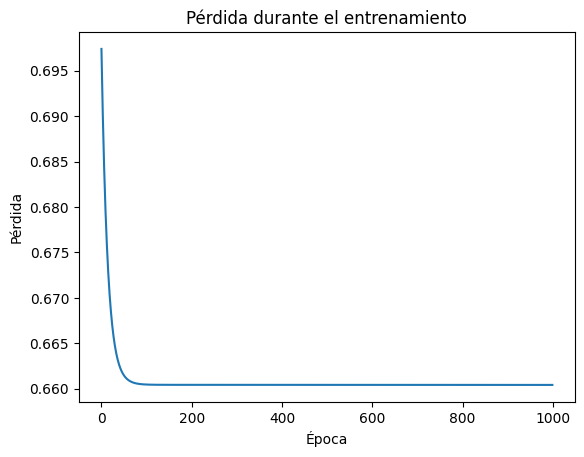

Modelo guardado en '../output/models/model_weights.json'


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# Cargar datos
train_data = pd.read_csv('../data/processed/train_set_normalized.csv')
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

# Funciones de activación y sus derivadas
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Inicialización de pesos
def initialize_weights(input_dim, hidden_dim, output_dim):
    W1 = np.random.randn(input_dim, hidden_dim) * 0.01
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, hidden_dim) * 0.01
    b2 = np.zeros((1, hidden_dim))
    W3 = np.random.randn(hidden_dim, output_dim) * 0.01
    b3 = np.zeros((1, output_dim))
    return W1, b1, W2, b2, W3, b3

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

# Backward propagation
def backward_propagation(X, y, Z1, A1, Z2, A2, Z3, A3, W1, W2, W3):
    m = X.shape[0]
    one_hot_y = np.eye(2)[y.astype(int)]
    
    dZ3 = A3 - one_hot_y
    dW3 = (1/m) * np.dot(A2.T, dZ3)
    db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)
    
    dZ2 = np.dot(dZ3, W3.T) * sigmoid_derivative(A2)
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    
    return dW1, db1, dW2, db2, dW3, db3

# Entrenamiento
def train(X, y, hidden_dim, num_epochs, learning_rate):
    input_dim = X.shape[1]
    output_dim = 2  # Binario: maligno o benigno
    
    W1, b1, W2, b2, W3, b3 = initialize_weights(input_dim, hidden_dim, output_dim)
    
    losses = []
    
    for epoch in range(num_epochs):
        Z1, A1, Z2, A2, Z3, A3 = forward_propagation(X, W1, b1, W2, b2, W3, b3)
        
        loss = -np.mean(np.log(A3[range(len(y)), y.astype(int)]))
        losses.append(loss)
        
        dW1, db1, dW2, db2, dW3, db3 = backward_propagation(X, y, Z1, A1, Z2, A2, Z3, A3, W1, W2, W3)
        
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3
        
        if epoch < 100 and epoch % 10 == 0:
            print(f"Epoch {epoch:03d}, Loss: {loss:.8f}")
        elif epoch >= 100 and epoch % 100 == 0:
            print(f"Epoch {epoch:03d}, Loss: {loss:.8f}")

    
    return W1, b1, W2, b2, W3, b3, losses

# Entrenamiento del modelo
hidden_dim = 25
num_epochs = 1000
learning_rate = 0.01

W1, b1, W2, b2, W3, b3, losses = train(X_train, y_train, hidden_dim, num_epochs, learning_rate)

# Graficar la pérdida
plt.plot(losses)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

# Guardar el modelo en formato JSON
model_data = {
    'W1': W1.tolist(),
    'b1': b1.tolist(),
    'W2': W2.tolist(),
    'b2': b2.tolist(),
    'W3': W3.tolist(),
    'b3': b3.tolist()
}

with open('../output/models/model_weights.json', 'w') as f:
    json.dump(model_data, f)

print("Modelo guardado en '../output/models/model_weights.json'")

In [2]:
# Ejemplo de cómo cargar el modelo (se necesitará más adelante)
# with open('../output/models/model_weights.json', 'r') as f:
#     loaded_model = json.load(f)
# 
# W1 = np.array(loaded_model['W1'])
# b1 = np.array(loaded_model['b1'])
# W2 = np.array(loaded_model['W2'])
# b2 = np.array(loaded_model['b2'])
# W3 = np.array(loaded_model['W3'])
# b3 = np.array(loaded_model['b3'])

## Accuracy

In [3]:
def predict(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_propagation(X, W1, b1, W2, b2, W3, b3)
    return np.argmax(A3, axis=1)

# Después del entrenamiento
y_pred = predict(X_train, W1, b1, W2, b2, W3, b3)
accuracy = np.mean(y_pred == y_train)
print(f"Accuracy en el conjunto de entrenamiento: {accuracy:.4f}")

Accuracy en el conjunto de entrenamiento: 0.6272
